<a href="https://colab.research.google.com/github/BhaskarBurugu/adi/blob/master/AircraftAcciedentClasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from string import punctuation
from os import listdir
from numpy import array

# Import label encoder 
from sklearn import preprocessing   
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
path = '/gdrive/My Drive/AIML/NLP/Aircraft/'

In [5]:
df1 = pd.read_csv(path+'Facts.csv')

In [6]:
df2 =  pd.read_csv(path+'Additional Facts.csv')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1738 non-null   int64 
 1   Title          1738 non-null   object
 2   Sent           1738 non-null   object
 3   Len            1738 non-null   int64 
 4   Check_Schemes  1738 non-null   int64 
 5   Intraction1    1099 non-null   object
 6   Intraction2    1098 non-null   object
 7   Unnamed: 7     1 non-null      object
dtypes: int64(3), object(5)
memory usage: 108.8+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sent         77 non-null     object
 1   Intraction1  76 non-null     object
 2   Intraction2  76 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [9]:
df1.dropna(subset=['Intraction1'],inplace=True)
df1.dropna(subset=['Intraction2'],inplace=True)

In [10]:
df2.dropna(subset=['Intraction1'],inplace=True)
df2.dropna(subset=['Intraction2'],inplace=True)

In [11]:
df3 = df1[['Sent']]
df3['label'] = df1['Intraction1'].str.strip() + '-'+df1['Intraction2'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df4 = df2[['Sent']]
df4['label'] = df2['Intraction1'].str.strip() + '-'+df2['Intraction2'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df3.shape

(1098, 2)

In [14]:
df4.shape

(76, 2)

In [15]:
df=df3.append(df4,ignore_index=True)

In [16]:
df.shape

(1174, 2)

In [17]:
#label = df1['Intraction1'] + '-'+df1['Intraction1']
#df = df1[['Title','Sent','Len']]
#df['label'] = df1['Intraction1'].str.strip() + '-'+df1['Intraction2'].str.strip()

In [18]:
df.head()

,Sent,label
0,The aircraft had safely landed on runway 27 a...,control-control process
1,The aircraft could not vacate the runway and ...,control process-workspace
2,"After landing while taxiing, aircraft took a ...",control process-workspace
3,Major Structural damage occurred including da...,control-control process
4,The aircraft was under the command of a pilot...,organization-processing


In [19]:
df.shape

(1174, 2)

In [20]:
df.dropna(subset=['label'],inplace=True)

In [21]:
df = df[df.label != '---']
df = df[df.label != '--']
df = df[df.label != '`-`']

In [22]:
df[df.label != '-']

,Sent,label
0,The aircraft had safely landed on runway 27 a...,control-control process
1,The aircraft could not vacate the runway and ...,control process-workspace
2,"After landing while taxiing, aircraft took a ...",control process-workspace
3,Major Structural damage occurred including da...,control-control process
4,The aircraft was under the command of a pilot...,organization-processing
...,...,...
1169,The fog entered in the cabin and rduced the vi...,workspace-environment
1170,The cabin light was insufficient for pilots to...,workspace-environment
1171,The continuous faulty alarm was distrubing the...,workspace-environment
1172,the electronic interference of the system has ...,workspace-environment


In [23]:
df.head()

,Sent,label
0,The aircraft had safely landed on runway 27 a...,control-control process
1,The aircraft could not vacate the runway and ...,control process-workspace
2,"After landing while taxiing, aircraft took a ...",control process-workspace
3,Major Structural damage occurred including da...,control-control process
4,The aircraft was under the command of a pilot...,organization-processing


In [24]:
df['label'].value_counts()

organization-processing        175
actuator-control               123
control-control process        115
sensor-processing               90
control process-environment     68
control process-display         42
display-sensor                  29
processing-actuator             25
sensor-environment              15
workspace-environment           15
control process-workspace       12
sensor-workspace                 6
sensor-display                   3
control-display                  2
processing-control               1
processing-workspace             1
control-environment              1
display-processing               1
Name: label, dtype: int64

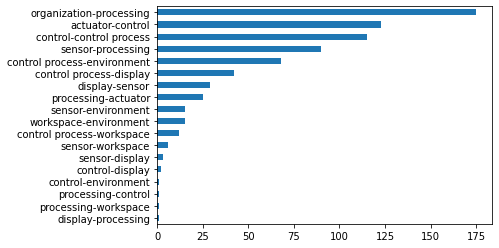

In [25]:
# using a function df.plot.bar()
df.label.value_counts().sort_values().plot(kind = 'barh')

In [26]:
df1 = df[df['label']=='organization-processing'][0:15]
df_final = df1

df1 = df[df['label']=='actuator-control'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='control-control process'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='sensor-processing'][0:15]
df_final = df_final.append(df1)



In [27]:
#@title
df1 = df[df['label']=='control process-environment'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='control process-display'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='display-sensor'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='processing-actuator'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='workspace-environment'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='sensor-environment'][0:15]
df_final = df_final.append(df1)

df1 = df[df['label']=='control process-workspace'][0:12]
df_final = df_final.append(df1)

In [28]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [29]:
# Encode labels in 
df_final['label_y']= label_encoder.fit_transform(df_final['label'])   
df_final

,Sent,label,label_y
4,The aircraft was under the command of a pilot...,organization-processing,6
6,The aircraft was under command of PIC having ...,organization-processing,6
11,The aircraft was under the command of student...,organization-processing,6
12,The training flight was authorized by Flight ...,organization-processing,6
13,The first sortie of the student trainee pilot...,organization-processing,6
...,...,...,...
110,Pilot’s attempt to land on a slush covered ru...,control process-workspace,3
112,AFM did not adequately emphasize landing dist...,control process-workspace,3
353,The airplane came to rest in a drainage ditch...,control process-workspace,3
693,"Friction quality of the last 1,500 feet of ru...",control process-workspace,3


In [30]:
df_final.shape

(162, 3)

In [31]:
df_final = df_final.sample(frac=1)

In [32]:
df_final.head()

,Sent,label,label_y
19,The ATC controller immediately activated the ...,organization-processing,6
131,The aircraft was damaged by the release of hi...,control process-display,1
35,The aircraft came to rest in 25 feet of water...,control-control process,4
1101,crew found themselves in poor and rapidly dete...,sensor-environment,8
78,2 engine fire warning,control process-display,1


In [33]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [34]:
# turn a doc into clean tokens
def clean_data(data):
	# split into tokens by white space
	tokens = data.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

In [35]:
# load doc and add to vocab
def add_doc_to_vocab(data, vocab):
	tokens = clean_data(data)
	# update counts
	vocab.update(tokens)

In [36]:
# load all docs in a directory
def process_docs(df, vocab):
  for data in df:
      #print(data)
      add_doc_to_vocab(data, vocab)

In [37]:
from collections import Counter

In [38]:
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs(df['Sent'], vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

2502
[('The', 262), ('runway', 117), ('airplane', 116), ('flight', 109), ('aircraft', 101), ('engine', 78), ('pilot', 76), ('control', 73), ('landing', 71), ('approach', 66), ('failed', 64), ('takeoff', 61), ('right', 55), ('captain', 50), ('feet', 48), ('failure', 46), ('procedures', 40), ('controller', 38), ('left', 37), ('air', 37), ('Flightcrew', 36), ('system', 36), ('due', 35), ('flightcrew', 34), ('power', 32), ('loss', 32), ('low', 31), ('descent', 31), ('accident', 30), ('Air', 30), ('traffic', 30), ('resulted', 30), ('airport', 30), ('time', 29), ('speed', 28), ('caused', 28), ('gear', 27), ('ground', 27), ('fuel', 27), ('Flight', 26), ('instrument', 26), ('pressure', 26), ('Pilot', 25), ('could', 24), ('crew', 24), ('first', 23), ('Airport', 23), ('pilots', 23), ('position', 23), ('conditions', 23)]


In [39]:

# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

1257


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_final['Sent']
y = df_final['label_y']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

1161    loss of directional control on a slippery runway.
35       The aircraft came to rest in 25 feet of water...
333      The flightcrew of N805C did not see the airpo...
1102    The controller, who could not see the runway d...
107      Right engine anti ice failed due to light dis...
                              ...                        
0        The aircraft had safely landed on runway 27 a...
20       The flight was under the command of an ATPL h...
81       The No 2 Engine trailed white smoke throughou...
201      The pilot of N96402 did not have radio contac...
115      Kennedy International Airport, Jamaica, New Y...
Name: Sent, Length: 129, dtype: object

In [44]:
#turn a doc into clean tokens
def clean_doc(doc, vocab):
	#split into tokens by white space
	tokens = doc.split()
	#remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	#filter out tokens not in vocab
	tokens = [w for w in tokens if w in vocab]
	tokens = ' '.join(tokens)
	return tokens

In [45]:
#load all docs in a directory
def process_docs(data, vocab):
	documents = list()
	#walk through all files in the folder
	for sent in data:
		#clean doc
		tokens = clean_doc(sent, vocab)
		#add to list
		documents.append(tokens)
	return documents

In [46]:
#load all training reviews
train_docs = process_docs(X_train, vocab)

In [47]:
train_docs

['loss directional control slippery runway',
 'The aircraft came rest feet water feet departure end runway',
 'The flightcrew see airport time either change course avoid mountains start climb clear mountains',
 'The controller could see runway due fog initially responded OK',
 'Right engine anti ice failed due light discrepancy',
 'There response crew flight whose last recorded transmission',
 'Angle attack sensor blocked due icing erroneos input receive board computer',
 'The gear warning horn light provided distraction Flightcrew',
 'The pilots reported difficulties radio transmission',
 'Malfunction major electrical system distracted pilot critical time',
 'The winds time gusty variable swirling',
 'Failure captain land airplane runway point sufficient allow safe stopping distance',
 'He also stated able maintain altitude airplane descending Elmira approach lost radar contact airplane',
 'The aircraft command PIC ALTP Co pilot CPL',
 'Radar service terminated',
 'When became clear K

In [48]:
from keras.preprocessing.text import Tokenizer

In [49]:
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)

In [50]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [51]:
encoded_docs

[[82, 253, 7, 254, 3],
 [1, 2, 120, 255, 8, 83, 8, 39, 30, 3],
 [1, 40, 48, 9, 23, 121, 122, 123, 49, 124, 84, 50, 31, 124],
 [1, 15, 41, 48, 3, 13, 11, 256, 257, 258],
 [85, 10, 259, 125, 32, 13, 51, 260],
 [52, 261, 42, 6, 262, 53, 126, 54],
 [263, 264, 265, 127, 13, 266, 267, 268, 269, 128, 270],
 [1, 14, 86, 271, 51, 129, 272, 40],
 [1, 16, 130, 131, 43, 54],
 [273, 132, 274, 55, 133, 4, 134, 23],
 [1, 87, 23, 88, 275, 276],
 [19, 17, 135, 20, 3, 136, 137, 277, 138, 278, 279],
 [280, 56, 281, 282, 283, 33, 20, 139, 284, 12, 57, 24, 58, 20],
 [1, 2, 59, 285, 286, 287, 4, 60],
 [24, 140, 288],
 [289,
  141,
  31,
  61,
  2,
  290,
  18,
  34,
  17,
  89,
  142,
  143,
  291,
  90,
  292,
  25,
  62,
  293,
  294,
  144,
  49,
  295,
  63],
 [17, 145, 5, 14, 146, 147, 148, 50, 149, 91, 150, 5, 14, 2, 64, 3],
 [151,
  152,
  296,
  92,
  297,
  298,
  153,
  142,
  299,
  65,
  89,
  1,
  20,
  300,
  154,
  93,
  9,
  301,
  302,
  9,
  303,
  155,
  156,
  157,
  304,
  93,
  157],
 

We also need to ensure that all documents have the same length.

This is a requirement of Keras for efficient computation. We could truncate reviews to the smallest size or zero-pad (pad with the value ‘0’) reviews to the maximum length, or some hybrid. In this case, we will pad all reviews to the length of the longest review in the training dataset.

First, we can find the longest review using the max() function on the training dataset and take its length. We can then call the Keras function pad_sequences() to pad the sequences to the maximum length by adding 0 values on the end.

In [52]:
from keras.preprocessing.sequence import pad_sequences

In [53]:
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#Ytrain = train['label_y']

In [54]:
Xtrain

array([[ 82, 253,   7, ...,   0,   0,   0],
       [  1,   2, 120, ...,   0,   0,   0],
       [  1,  40,  48, ...,   0,   0,   0],
       ...,
       [  1, 181,  10, ...,   0,   0,   0],
       [  1,   4,  43, ...,   0,   0,   0],
       [758, 759,   9, ...,   0,   0,   0]], dtype=int32)

In [55]:
y_train

1161    10
35       4
333      9
1102     8
107      2
        ..
0        4
20       6
81       1
201      5
115      0
Name: label_y, Length: 129, dtype: int64

In [56]:
#load all test reviews
test_docs = process_docs(X_test, vocab)

In [57]:
test_docs

['In order avoid birds trainee pilot took continuous right turn approach track thereafter got completely disoriented flight path',
 'Cessna aircraft VT CAX involved forced landing accident operating flight Ranchi Fursatganj Airfield Raibarely',
 'Weather time accident characterized subfreezing temperature almost steady moderatetoheavysnowfall obscured visibility',
 'Pitot tube covered mud daubers nest',
 'Cessna Citation pilot copilot three passengers aboard overran end runway following instrument landing system approach crashed burned Mercer County Airport BluefieldWest Virginia',
 'The fuel tanks ruptured principal tree impact',
 'Captain failed immediately initiate goaround instructed air traffic controller',
 'The displacement fan module course engine failure sequence caused loss hydraulic systems AB jammed first rudder pedals neutral position',
 'The airplane came rest drainage ditch airport perimeter',
 'Oil leaks caused poor mating abutment surfaces',
 'The controller made sever

In [58]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

In [59]:
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#Ytest = test['label_y']

In [60]:
Xtest

array([[322,  49,  27,   4, 191, 401,  85,  62,  12, 745, 733, 349,   6,
         98,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 70,   2, 112,  81,   5,  22, 594,   6, 226,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [105,  23,  22, 621, 197,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [477, 709,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 70,   4, 426,  30,   3, 151,   5,  55,  12, 319,   9,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,  68, 417,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 1

In [61]:
Xtrain

array([[ 82, 253,   7, ...,   0,   0,   0],
       [  1,   2, 120, ...,   0,   0,   0],
       [  1,  40,  48, ...,   0,   0,   0],
       ...,
       [  1, 181,  10, ...,   0,   0,   0],
       [  1,   4,  43, ...,   0,   0,   0],
       [758, 759,   9, ...,   0,   0,   0]], dtype=int32)

In [62]:
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

In [63]:
print(len(X_train))

129


In [64]:
y_test.unique()

array([ 6,  4, 10,  2,  0,  3,  7,  1,  8,  5,  9])

In [65]:
max_length

28

In [66]:
import tensorflow as tf

In [67]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=11)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=11)

In [68]:
# define model
#Initialize model, reshape & normalize data
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

In [69]:
model.add(tf.keras.layers.Embedding(vocab_size,30,input_length=max_length))
#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [70]:
#model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu'))

In [71]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu'))

In [72]:
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu'))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

#model.add(tf.keras.layers.Dense(30, activation='sigmoid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(11, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 30)            22890     
                                                                 
 batch_normalization (BatchN  (None, 28, 30)           120       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 28, 60)            1860      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 60)           240       
 hNormalization)                                                 
                                                                 
 conv1d (Conv1D)             (None, 24, 16)            4816      
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 16)            1

In [73]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1, decay=0.01,momentum = 0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [78]:
#Lets train for 10 more steps
hist_model = model.fit(Xtrain, y_train,
                             epochs=30,
                             initial_epoch=0,
                             batch_size = 16,    
                             validation_data=(Xtest,y_test))

Epoch 1/30
9/9 [==============================] - 0s 14ms/step - loss: 0.9808 - accuracy: 0.6744 - val_loss: 3.7107 - val_accuracy: 0.0909
Epoch 2/30
9/9 [==============================] - 0s 9ms/step - loss: 1.0077 - accuracy: 0.6512 - val_loss: 4.2261 - val_accuracy: 0.1212
Epoch 3/30
9/9 [==============================] - 0s 12ms/step - loss: 0.9082 - accuracy: 0.6279 - val_loss: 4.8160 - val_accuracy: 0.1212
Epoch 4/30
9/9 [==============================] - 0s 10ms/step - loss: 0.9225 - accuracy: 0.6434 - val_loss: 4.3515 - val_accuracy: 0.1212
Epoch 5/30
9/9 [==============================] - 0s 8ms/step - loss: 0.9198 - accuracy: 0.6744 - val_loss: 4.4178 - val_accuracy: 0.0606
Epoch 6/30
9/9 [==============================] - 0s 11ms/step - loss: 0.7156 - accuracy: 0.7907 - val_loss: 4.7895 - val_accuracy: 0.0909
Epoch 7/30
9/9 [==============================] - 0s 10ms/step - loss: 0.7427 - accuracy: 0.7519 - val_loss: 4.5146 - val_accuracy: 0.1212
Epoch 8/30
9/9 [=============

In [79]:
scores = model.evaluate(Xtest, y_test, verbose=0)
scores

[5.756433486938477, 0.1515151560306549]

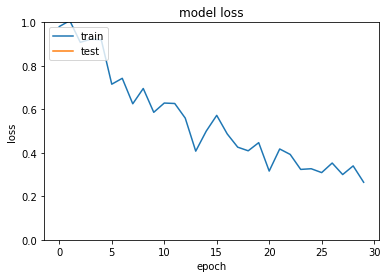

In [80]:
# summarize history for loss
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis(ymin =0, ymax =1)
plt.show()

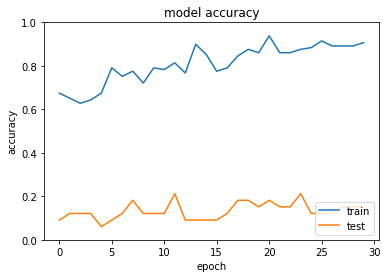

In [81]:
# summarize history for accuracy
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.axis(ymin =0, ymax =1)
plt.show()

In [82]:
final_model = model

In [83]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sn

In [84]:
y_pred_ohe = final_model.predict(Xtrain)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1) 

In [85]:
y_true_labels = np.argmax(y_train, axis=1)

In [86]:
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels) 
confusion_matrix

array([[10,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13]])

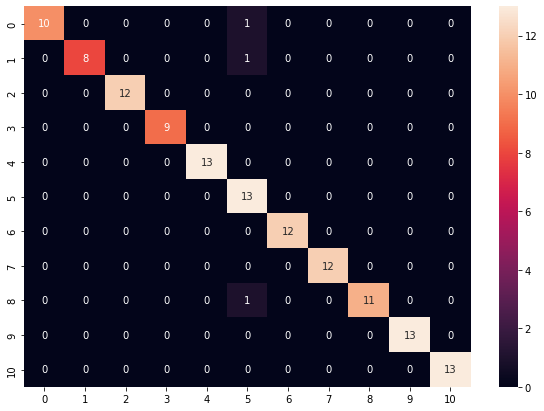

In [87]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)